In [2]:
from molmap.model import RegressionEstimator, MultiClassEstimator, MultiLabelEstimator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from molmap import dataset
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from molmap import MolMap
from molmap import feature
# 打开molmap的环境，molmap.model;molmap等宏包会自动导入到这个环境中。
# from tensorflow.keras.datasets import mnist
import tensorflow as tf
import os
from tensorflow.keras.layers import Input,Dense, Conv2D, Conv2DTranspose, MaxPooling2D, Flatten, UpSampling2D, Reshape
from tensorflow.keras.models import Model,Sequential
from joblib import load,dump #导入模型 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
gpuid = "2"
os.environ["CUDA_VISIBLE_DEVICES"] = gpuid
physical_gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_gpus[0], True)

In [4]:
X1 = load('/raid/wx_home/learning/2_190w_model_new/MACCSFP_melucule3.data2')

In [5]:
X2 = X1[:10]

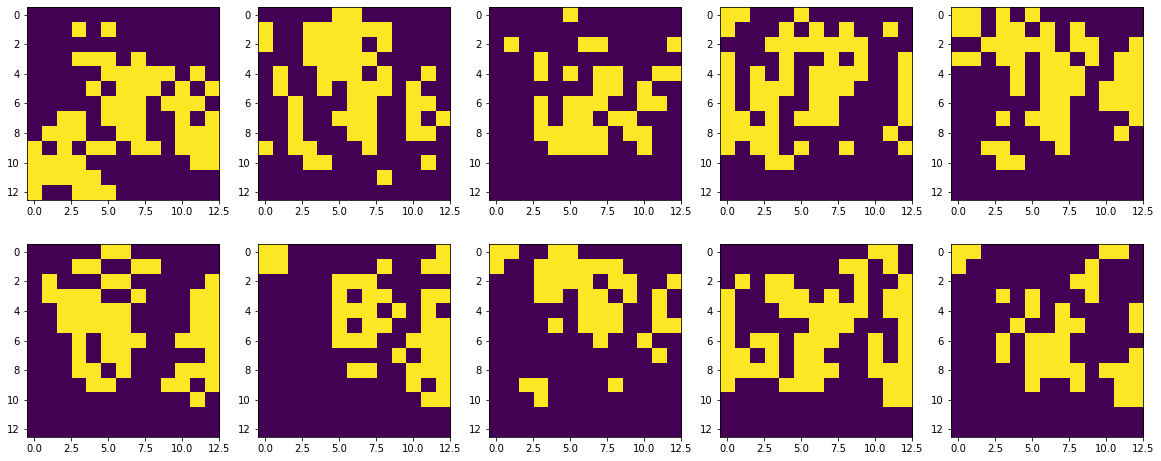

In [6]:
fig = plt.figure(figsize = (20,8))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    ax.imshow(X2[i])

In [6]:
X2.shape

(10, 13, 13, 1)

In [7]:
class Encoder(Model):
    def __init__(self):
        super().__init__()
        self.flatten = Flatten()
        self.d1 = Dense(256, activation='relu')
        self.d2 = Dense(128, activation='relu')
        self.d3 = Dense(64, activation='relu')
        self.d4 = Dense(32, activation='relu')
        self.d5 = Dense(16, activation='relu')
        self.d6 = Dense(3, activation='relu')
        
    def call(self,x):
        x = self.flatten(x)
        x = self.d1(x)
        x = self.d2(x)
        x = self.d3(x)
        x = self.d4(x)
        x = self.d5(x)
        return self.d6(x)       
    
    
class Decoder(Model):
    def __init__(self):
        super().__init__()
        self.d7 = Dense(16, activation='relu')
        self.d8 = Dense(32, activation='relu')
        self.d9 = Dense(64, activation='relu')
        self.d10 = Dense(128, activation='relu')
        self.d11 = Dense(256, activation='relu')
        self.d12 = Dense(169, activation='sigmoid')
        self.re = Reshape((13,13))
    
    def call(self,x):
        x = self.d7(x)
        x = self.d8(x)
        x = self.d9(x)
        x = self.d10(x)
        x = self.d11(x)
        x = self.d12(x)
        return  self.re(x)
        
class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
        
    def call(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [8]:
model = Autoencoder()

In [9]:
model.compile(optimizer='Adam',loss='binary_crossentropy')
history1 = model.fit(X1, X1, batch_size=768, epochs=100)

Epoch 1/100
2523/2523 [==============================] - 18s 6ms/step - loss: 0.2684
Epoch 2/100
2523/2523 [==============================] - 15s 6ms/step - loss: 0.2367
Epoch 3/100
2523/2523 [==============================] - 15s 6ms/step - loss: 0.2284
Epoch 4/100
2523/2523 [==============================] - 15s 6ms/step - loss: 0.2223
Epoch 5/100
2523/2523 [==============================] - 15s 6ms/step - loss: 0.2180
Epoch 6/100
2523/2523 [==============================] - 15s 6ms/step - loss: 0.2146
Epoch 7/100
2523/2523 [==============================] - 15s 6ms/step - loss: 0.2118
Epoch 8/100
2523/2523 [==============================] - 15s 6ms/step - loss: 0.2099
Epoch 9/100
2523/2523 [==============================] - 15s 6ms/step - loss: 0.2078
Epoch 10/100
2523/2523 [==============================] - 15s 6ms/step - loss: 0.2063
Epoch 11/100
2523/2523 [==============================] - 15s 6ms/step - loss: 0.2057
Epoch 12/100
2523/2523 [==============================] - 15s 6

In [10]:
model.compile(optimizer='Adam',loss='mse')
history2 = model.fit(X1, X1, batch_size=768, epochs=100)

Epoch 1/100
2523/2523 [==============================] - 15s 6ms/step - loss: 0.0553
Epoch 2/100
2523/2523 [==============================] - 14s 6ms/step - loss: 0.0544
Epoch 3/100
2523/2523 [==============================] - 14s 6ms/step - loss: 0.0542
Epoch 4/100
2523/2523 [==============================] - 14s 6ms/step - loss: 0.0541
Epoch 5/100
2523/2523 [==============================] - 14s 6ms/step - loss: 0.0540
Epoch 6/100
2523/2523 [==============================] - 14s 6ms/step - loss: 0.0539
Epoch 7/100
2523/2523 [==============================] - 14s 5ms/step - loss: 0.0539
Epoch 8/100
2523/2523 [==============================] - 14s 5ms/step - loss: 0.0538
Epoch 9/100
2523/2523 [==============================] - 14s 5ms/step - loss: 0.0539
Epoch 10/100
2523/2523 [==============================] - 14s 6ms/step - loss: 0.0537
Epoch 11/100
2523/2523 [==============================] - 14s 5ms/step - loss: 0.0537
Epoch 12/100
2523/2523 [==============================] - 14s 6

<AxesSubplot:>

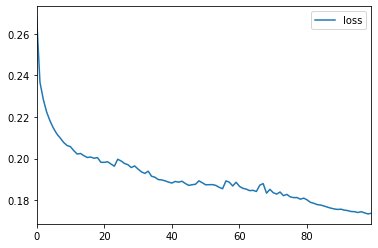

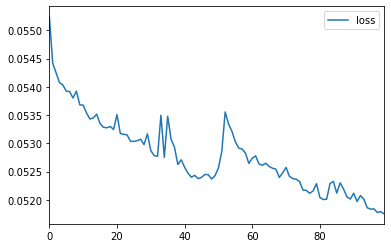

In [11]:
pd.DataFrame(history1.history).plot()
pd.DataFrame(history2.history).plot()

In [12]:
y_pre = model.predict(X1[:10])

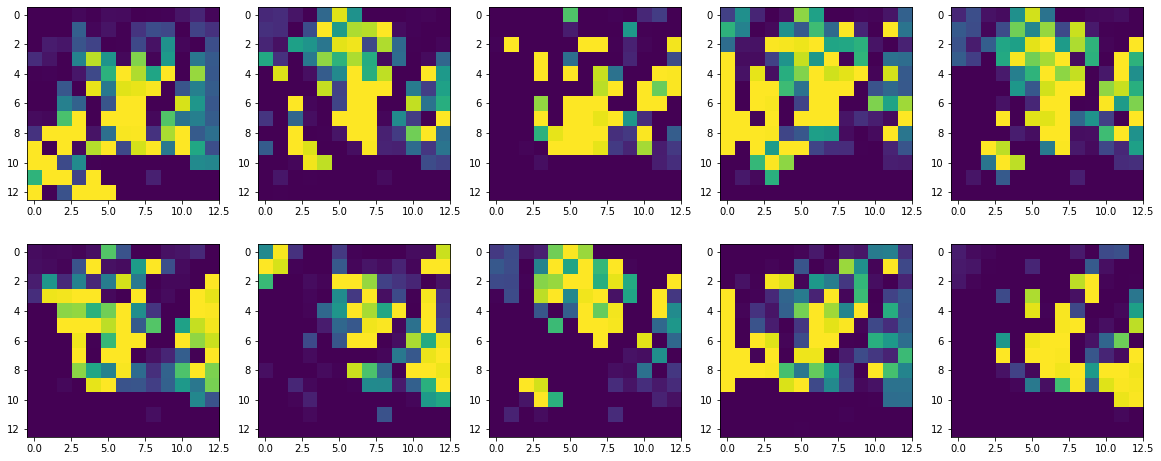

In [13]:
fig = plt.figure(figsize = (20,8))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    ax.imshow(y_pre[i])

In [14]:
model.save('test_1_model')

In [43]:
X3 = model.encoder(X1[:200000])

In [40]:
from keras.backend import set_session
from keras.backend import clear_session
from keras.backend import get_session
import tensorflow as tf
import gc
 
# Reset Keras Session
def reset_keras():
    sess = get_session()
    clear_session()
    sess.close()
    sess = get_session()
 
    try:
        del classifier # this is from global space - change this as you need
    except:
        pass
 
    print(gc.collect()) # if it does something you should see a number as output
 
    # use the same config as you used to create the session
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    set_session(tf.compat.v1.Session(config=config))

In [45]:
reset_keras()

100


In [44]:
X3

<tf.Tensor: shape=(200000, 3), dtype=float32, numpy=
array([[16.913223 ,  9.003444 , 16.801203 ],
       [17.327446 , 12.183651 , 26.989477 ],
       [55.04035  , 15.95218  , 18.561796 ],
       ...,
       [28.930975 ,  3.7196262,  2.9373443],
       [76.32137  , 28.849741 , 48.899048 ],
       [42.104656 , 34.952377 , 40.65241  ]], dtype=float32)>

In [47]:
X6 = model.encoder(X1[200000:400000])
reset_keras()
X7 = model.encoder(X1[400000:600000])
reset_keras()
X8 = model.encoder(X1[600000:800000])
reset_keras()
X9 = model.encoder(X1[800000:1000000])
reset_keras()
X10 = model.encoder(X1[1000000:1200000])
reset_keras()
X11 = model.encoder(X1[1200000:1400000])
reset_keras()
X12 = model.encoder(X1[1400000:1600000])
reset_keras()
X13 = model.encoder(X1[1600000:1800000])
reset_keras()
X14 = model.encoder(X1[1800000:2000000])

162
100
100
100
100
100
100
100


In [49]:
dump(X3, '/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test1_data/1-200000')
dump(X6, '/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test1_data/200000-400000')
dump(X7, '/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test1_data/400000-600000')
dump(X8, '/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test1_data/600000-800000')
dump(X9, '/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test1_data/800000-1000000')
dump(X10, '/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test1_data/1000000-1200000')
dump(X11, '/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test1_data/1200000-1400000')
dump(X12, '/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test1_data/1400000-1600000')
dump(X13, '/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test1_data/1600000-1800000')
dump(X14, '/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test1_data/1800000-2000000')

['/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test1_data/1800000-2000000']